In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
colnames=['userid','productid','ratings','timestamp']
df=pd.read_csv("C:/Somduity/Python/Datasets/ratings_Electronics.csv",names=colnames)

In [4]:
df.head()
df.dtypes

userid        object
productid     object
ratings      float64
timestamp      int64
dtype: object

In [5]:
import matplotlib.pyplot as plt

In [6]:
df=df.drop(columns='timestamp',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B809F46A0>]],
      dtype=object)

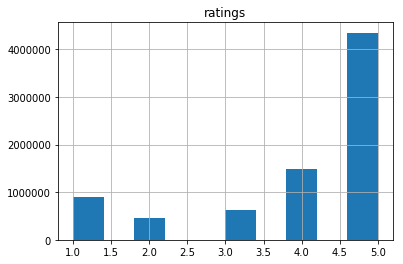

In [7]:
df.hist()

In [8]:
df.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [9]:
df.shape

(7824482, 3)

In [10]:
df1=pd.DataFrame(df.groupby('userid').agg("count")).reset_index()
df1.head(10)

,userid,productid,ratings
0,A00000262KYZUE4J55XGL,1,1
1,A000063614T1OE0BUSKUT,2,2
2,A00009182QVLSWIGHLS1B,1,1
3,A00009661LC9LQPGKJ24G,1,1
4,A00010809P09NUU6ZP6H,1,1
5,A00014061C2IZNE0YEILY,1,1
6,A000145014WOTZJ5NSKOR,1,1
7,A00015222LZ55IJSVL5IX,1,1
8,A00015228CUPGPF957DS,1,1
9,A0001528BGUBOEVR6T5U,4,4


In [11]:
df2=df1[df1["ratings"]>50]
df2.head()

,userid,productid,ratings
5506,A100UD67AHFODS,116,116
5558,A100WO06OQR8BQ,132,132
9928,A105S56ODHGJEK,68,68
9965,A105TOJ6LTVMBG,71,71
13836,A10AFVU66A79Y1,65,65


In [12]:

df3=df.merge(df2,on="userid")
df3=df3.drop(columns={'productid_y','ratings_y'})
df3.head()


,userid,productid_x,ratings_x
0,AT09WGFUM934H,0594481813,3.0
1,AT09WGFUM934H,B00005105L,5.0
2,AT09WGFUM934H,B000068O1M,5.0
3,AT09WGFUM934H,B000068O34,5.0
4,AT09WGFUM934H,B000068O4J,5.0


In [13]:
df3.shape

(122171, 3)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test=train_test_split(df3,test_size=0.3)

In [16]:
X_train.shape

(85519, 3)

In [17]:
X_test.shape

(36652, 3)

In [25]:
import Recommenders as recommender

In [26]:
pr=recommender.popularity_recommender_py()

In [28]:
pr.create(X_train,'userid','productid_x')
   
    

KeyError: 'score'

In [31]:
R_df = X_train.pivot(index = 'userid', columns ='productid_x', values = 'ratings_x').fillna(0)
R_df.tail()

productid_x,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,7562434166,...,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LKG1MC8
userid,,,,,,,,,,,,,,,,,,,,,
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZNUHQSHZHSUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZOK5STV85FBJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
R_df.shape

(1466, 37385)

In [33]:
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(R_df, k = 50)

In [34]:
U.shape

(1466, 50)

In [35]:
Vt.shape

(50, 37385)

In [36]:
#diag
sigma = np.diag(sigma)

In [37]:
sigma.shape

(50, 50)

In [38]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [39]:
preds_df.head()

productid_x,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,7562434166,...,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LKG1MC8
0,0.001230,0.001519,0.009742,0.009458,0.009067,0.001318,0.004131,0.007566,0.001687,0.007411,...,0.002387,-0.017658,0.001057,-0.005266,0.003868,0.025575,0.008263,0.005219,-0.032903,-0.021734
1,-0.001292,-0.001243,0.020188,-0.008762,0.002045,0.001985,-0.002463,-0.007009,0.006309,-0.003844,...,-0.011273,-0.004836,0.001573,0.005269,0.005516,-0.047740,-0.000585,0.001493,-0.160844,0.066111
2,-0.004290,-0.004337,0.001190,-0.003920,-0.001532,0.004671,-0.001601,-0.003136,0.001399,0.002811,...,0.015850,-0.043386,0.000535,-0.001562,-0.000545,0.013628,-0.006083,0.000231,0.070141,0.010724
3,-0.003423,0.000535,0.004479,0.006347,-0.003303,-0.001191,0.002485,0.005078,-0.002767,0.003458,...,-0.006480,0.009604,-0.000791,0.010518,0.001112,-0.007643,0.006704,0.002472,0.007439,-0.015425
4,0.015117,0.000097,0.009799,0.008591,0.018968,0.005041,-0.003455,0.006873,0.013774,-0.001304,...,0.002890,0.111249,0.001399,0.015231,0.002381,0.021620,0.000461,0.001124,0.036805,-0.009080


In [40]:
sigma

array([[ 55.68277032,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  55.92201489,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  56.06487641, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  85.78294864,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         90.41941643,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 130.96499965]])